<a href="https://colab.research.google.com/github/Ganeshwalimbe/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/blob/main/Ganesh_Walimbe_Capstone_project_ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***PROJECT NAME :- ***

# **ZOMATO RESTAURANT CLUSTERING AND SENTIMENT ANALYSIS**

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [119]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [120]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
#importing dataset
data=pd.read_csv('/content/drive/MyDrive/AlmaBetter /Capstone projects /Ganesh Walimbe -capstone project -ZOMATO RESTAURANT CLUSTERING AND SENTIMENT ANALYSIS/ Zomato Restaurant names and Metadata.csv')

In [122]:
#printing first 5 rows
data.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gachibowli,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gachibowli,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-hotel-restaurant-gachibowli,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Beverages",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon-brew-company-gachibowli,"1,200","Best Bars & Pubs, Food Hygiene Rated Restaurants in Hyderabad, Top-Rated, Gold Curated, Hyderabad's Hottest","Asian, Continental, North Indian, Chinese, Mediterranean","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12noon to 12midnight (Fri-Sat)"


In [123]:
#printing last 5 rows
data.tail()

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gachibowli,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-gachibowli,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fri-Sun)"
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-counts-3-gachibowli,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1-gachibowli,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-noodles-lemon-tree-hotel-gachibowli,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [125]:
#coverting type of cost from object to integer
data['Cost'] = data['Cost'].str.replace(",","").astype('int64')

In [126]:
data.shape

(105, 6)

In [127]:
#cheking for missing values for names metadata data
data.isnull().sum()

Name           0 
Links          0 
Cost           0 
Collections    54
Cuisines       0 
Timings        1 
dtype: int64

In [128]:
#dropping collection column because it contains almost 50% missing values
data=data.drop(['Links','Collections'],axis=1)

In [129]:
#cheking for duplicates
data.duplicated().sum()

0

In [130]:
#dropping null values
data=data.dropna()

In [131]:
#creating a list of cuisines
cuisine_list=data.Cuisines.str.split(', ')
cuisine={}
for i in cuisine_list:
    for j in i:
        if (j in cuisine):
            cuisine[j]+=1
        else:
            cuisine[j]=1

In [132]:
cuisine

{'Chinese': 43,
 'Continental': 21,
 'Kebab': 6,
 'European': 4,
 'South Indian': 8,
 'North Indian': 60,
 'Biryani': 16,
 'Asian': 15,
 'Mediterranean': 5,
 'Desserts': 13,
 'Seafood': 4,
 'Beverages': 5,
 'Goan': 1,
 'Healthy Food': 1,
 'Lebanese': 1,
 'American': 6,
 'Ice Cream': 2,
 'Street Food': 2,
 'Fast Food': 15,
 'BBQ': 2,
 'Italian': 14,
 'Finger Food': 2,
 'Burger': 5,
 'Japanese': 2,
 'Salad': 5,
 'Sushi': 4,
 'Mexican': 1,
 'Mughlai': 6,
 'Bakery': 7,
 'Juices': 1,
 'Arabian': 2,
 'Andhra': 5,
 'Hyderabadi': 4,
 'Cafe': 6,
 'Spanish': 1,
 'Wraps': 1,
 'Thai': 3,
 'Indonesian': 1,
 'Modern Indian': 2,
 'Momos': 4,
 'Pizza': 1,
 'North Eastern': 1,
 'Mithai': 1,
 'Malaysian': 1}

# **Most prefered cuisines in restaurants**

In [133]:
#performing grouping of variables
cuisine_df=pd.DataFrame(list(cuisine.items()),columns=['cuisine_name','Counts_of_Restaurants'])
cuisine_df=cuisine_df.sort_values(by='Counts_of_Restaurants',ascending=False).head(10)
cuisine_df

,cuisine_name,Counts_of_Restaurants
5,North Indian,60
0,Chinese,43
1,Continental,21
6,Biryani,16
18,Fast Food,15
7,Asian,15
20,Italian,14
9,Desserts,13
4,South Indian,8
28,Bakery,7


In [134]:
cuisine_name=cuisine_df['cuisine_name']
counts_of_Restaurants=cuisine_df['Counts_of_Restaurants']

[Text(0.5, 1.0, 'Most prefered cuisines in restaurants')]

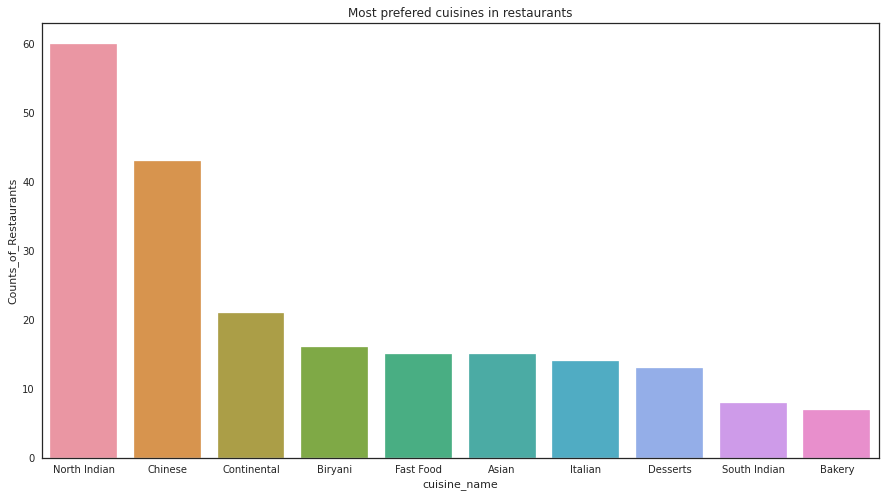

In [135]:
#plotting barplot of cuisines  v/s  counts_of_Restaurant
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=cuisine_df,x=cuisine_name,y=counts_of_Restaurants, ax=ax)
ax.set(title='Most prefered cuisines in restaurants')

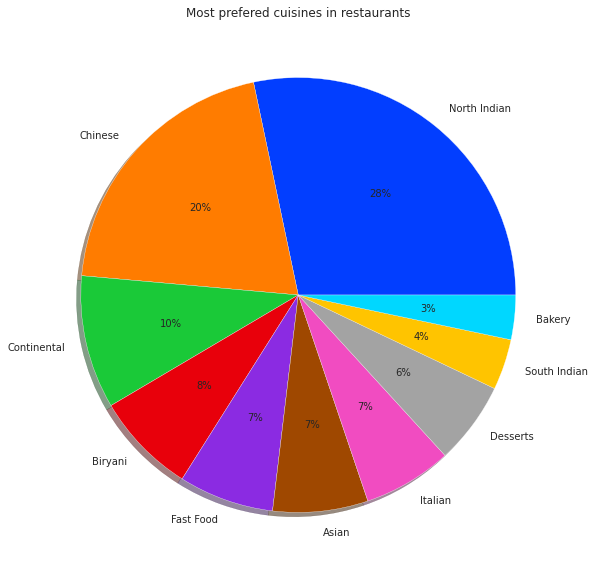

In [136]:
#plotting Most prefered cuisines in restaurants pie chart
plt.figure(figsize=(10,10))
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
# plotting data on chart
plt.pie(counts_of_Restaurants, labels=cuisine_name, colors=palette_color, autopct='%.0f%%',shadow=True)
plt.title("Most prefered cuisines in restaurants")

plt.show()

(-0.5, 1399.5, 1399.5, -0.5)

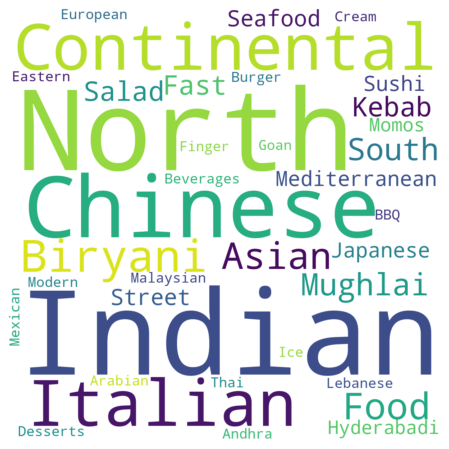

In [137]:
#Creating word cloud for Cuisines
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(15,8))
text = " ".join(name for name in data.sort_values('Cuisines',ascending=False).Cuisines[:50])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

**From above barplot and word cloud we can say that the most preferred cuisines in restaurants is North Indian, Chinese food, continental ,Biryani and fast food etc**

# **Highest spending by people in restaurants**

In [138]:
#performing grouping of variables
cost_restaurant=data.groupby(['Name','Cuisines'])['Cost'].sum().reset_index()
high_spending=cost_restaurant.sort_values(by='Cost',ascending=False).head(10)
high_spending

,Name,Cuisines,Cost
23,Collage - Hyatt Hyderabad Gachibowli,"Continental, Italian, North Indian, Chinese, Asian",2800
35,Feast - Sheraton Hyderabad Hotel,"Modern Indian, Asian, Continental, Italian",2500
0,10 Downing Street,"North Indian, Chinese, Continental",1900
48,Jonathan's Kitchen - Holiday Inn Express & Suites,"North Indian, Japanese, Italian, Salad, Sushi",1900
20,Cascade - Radisson Hyderabad Hitec City,"North Indian, Italian, Continental, Asian",1800
101,Zega - Sheraton Hyderabad Hotel,"Asian, Sushi",1750
73,Republic Of Noodles - Lemon Tree Hotel,"Thai, Asian, Chinese, Malaysian",1700
60,Mazzo - Marriott Executive Apartments,"Italian, North Indian, South Indian, Asian",1700
14,Barbeque Nation,"Mediterranean, North Indian, Kebab, BBQ",1600
9,Arena Eleven,Continental,1600


In [139]:
#defining columns for plotting barplot
cost=high_spending['Cost']
Restaurant_name=high_spending['Name']

[Text(0.5, 1.0, 'Highest spending by people in restaurants')]

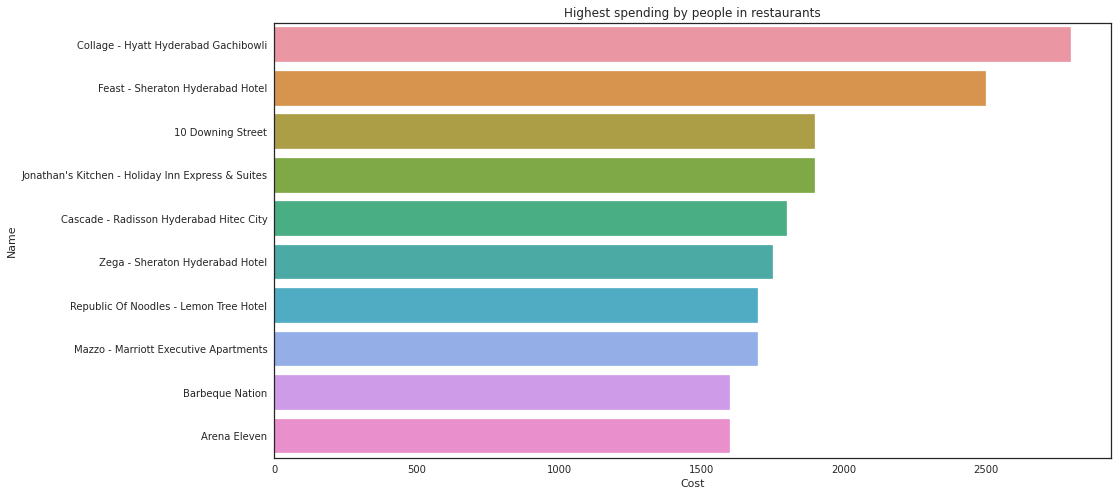

In [140]:
#plotting barplot to find top agents 
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=high_spending,x=cost,y=Restaurant_name, ax=ax)
ax.set(title='Highest spending by people in restaurants')

**From barplot we can see that ,

 Customers spending is highest at  restaurants named :

1.Collage-Hyatt Hyderabad Ghachibowli

2.Feast Sheraton Hyderabad hotel 

3.10 Downing street 

4.Jonathan’s kitchen-Holiday inn express and suites

5.Cascade –Radisson Hyderabad Hitec city 

Customers must have gone to these  restaurants for lunch ,dinner or for to  party**

# **Lowest spending by people in restaurants**

In [141]:
#performing grouping of variables
cost_restaurant=data.groupby(['Name','Cuisines'])['Cost'].sum().reset_index()
low_spending=cost_restaurant.sort_values(by='Cost',ascending=True).head(10)
low_spending

,Name,Cuisines,Cost
7,Amul,"Ice Cream, Desserts",150
61,Mohammedia Shawarma,"Street Food, Arabian",150
43,Hunger Maggi Point,Fast Food,200
50,KS Bakers,"Bakery, Desserts, Fast Food",200
82,Sweet Basket,"Bakery, Mithai",200
11,Asian Meal Box,Asian,200
62,Momos Delight,Momos,200
99,Wich Please,Fast Food,250
78,Shah Ghouse Spl Shawarma,Lebanese,300
24,Cream Stone,"Ice Cream, Desserts",350


[Text(0.5, 1.0, 'lowest spending by people in restaurants')]

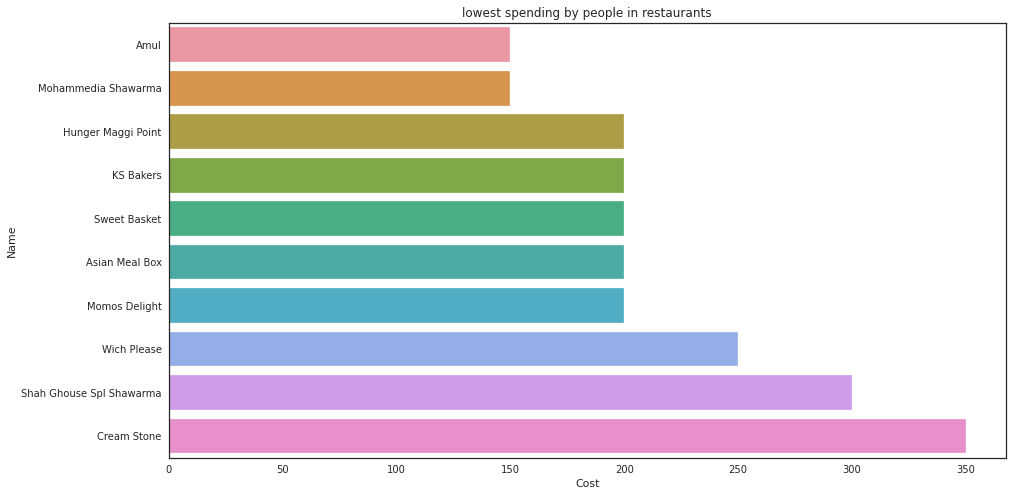

In [142]:
#plotting barplot to find top agents 
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=low_spending,x=low_spending['Cost'],y=low_spending['Name'], ax=ax)
ax.set(title='lowest spending by people in restaurants')

From barplot we can see that, 
Customers spending is highest at  restaurants named : 
1.Amul  

2.Mohammedia shawarma 

3.Hunger maggi point  

4.Ks bakers  

5.Sweet baskets  

Customers must have gone to  these restaurants to eat breakfast, fast foods ,ice creams and to drink  cold drinks..

# **Clustering**
Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. It is basically a collection of objects on the basis of similarity and dissimilarity between them.

In [143]:
#making a copy of dataset
df=data.copy()
df.head()


,Name,Cost,Cuisines,Timings
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,800,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,1300,"Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,800,"Biryani, North Indian, Chinese, Seafood, Beverages",12 Noon to 2 AM
4,Over The Moon Brew Company,1200,"Asian, Continental, North Indian, Chinese, Mediterranean","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12noon to 12midnight (Fri-Sat)"


In [144]:
#dropping uneccesary column
df=df.drop(['Timings'],axis=1)

In [145]:
df.shape

(104, 3)

In [146]:
#splitting cuisines
df['Cuisines'] = df['Cuisines'].str.replace(' ','')
df['Cuisines'] = df['Cuisines'].str.split(',')

In [147]:
df.head()

,Name,Cost,Cuisines
0,Beyond Flavours,800,"[Chinese, Continental, Kebab, European, SouthIndian, NorthIndian]"
1,Paradise,800,"[Biryani, NorthIndian, Chinese]"
2,Flechazo,1300,"[Asian, Mediterranean, NorthIndian, Desserts]"
3,Shah Ghouse Hotel & Restaurant,800,"[Biryani, NorthIndian, Chinese, Seafood, Beverages]"
4,Over The Moon Brew Company,1200,"[Asian, Continental, NorthIndian, Chinese, Mediterranean]"


In [148]:
#importing library
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

In [149]:
#joining sparse matrix together
df=df.join(pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(df.pop('Cuisines')),index=df.index, columns=mlb.classes_))

In [150]:
df.head()

,Name,Cost,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,...,NorthIndian,Pizza,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,Paradise,800,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,Flechazo,1300,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Shah Ghouse Hotel & Restaurant,800,0,0,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,0
4,Over The Moon Brew Company,1200,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [151]:
#dropping name column
x=df.drop('Name',axis=1)

In [152]:
#importing library
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# **K means clustering**

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters

**Elbow method :**

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse co

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f011f7896d0>,
                 estimator=KMeans(n_clusters=9), k=(2, 10), locate_elbow=False,
                 timings=False)

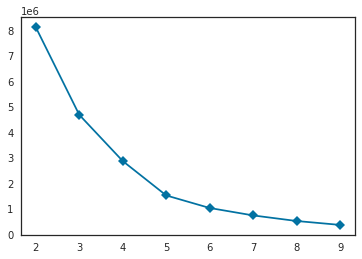

In [153]:
#elbow method for finding optimal value of k
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,10), metric='distortion', timings=False, locate_elbow=False
)

visualizer.fit(x) 
     # Fit the data to the visualizer

In [154]:
#fitting k means clustering model
kmeans = KMeans(n_clusters=5)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


In [155]:
y_kmeans.shape

(104,)

In [156]:
#creating new variable
df['km_labels'] = y_kmeans

Text(0.5, 1.0, 'visualizing clusters using k means clustering')

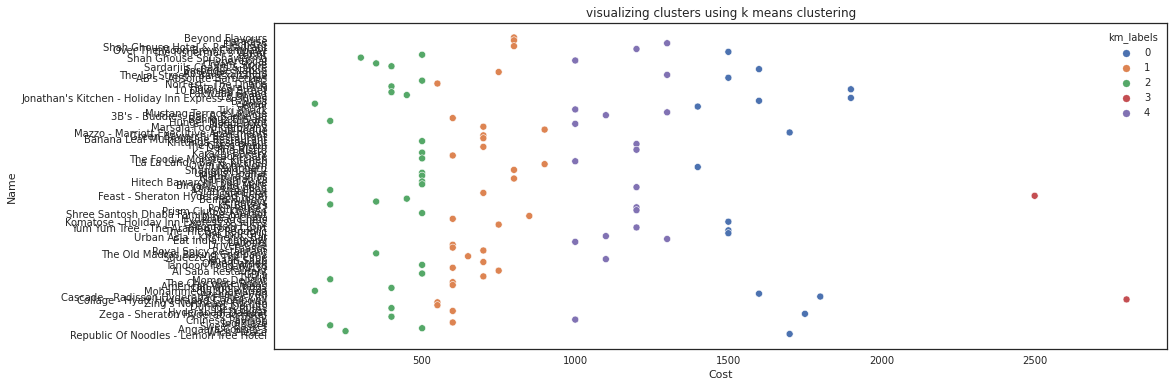

In [157]:
#plotting scatterplot to view clusters
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(x='Cost',y='Name',data=df,hue='km_labels', palette = 'deep')
plt.title('visualizing clusters using k means clustering')

After applying k means on the dataset we can see that from the scatter that restaurants are divided into 5 clusters using k means clustering Based on the cuisines

In [158]:
#printing k means cluster centres
kmeans.cluster_centers_

array([[ 1.61562500e+03,  6.25000000e-02,  6.25000000e-02,
         6.93889390e-18,  3.75000000e-01,  1.25000000e-01,
         0.00000000e+00, -1.38777878e-17,  5.55111512e-17,
        -1.38777878e-17, -6.93889390e-18,  3.12500000e-01,
         3.75000000e-01,  0.00000000e+00,  6.25000000e-02,
         2.77555756e-17,  6.93889390e-18,  6.25000000e-02,
         3.46944695e-18,  1.38777878e-17,  6.93889390e-18,
         3.46944695e-18,  2.50000000e-01,  1.25000000e-01,
         3.46944695e-18,  6.25000000e-02,  3.46944695e-18,
         6.25000000e-02,  1.25000000e-01,  3.46944695e-18,
         3.46944695e-18,  6.25000000e-02,  1.38777878e-17,
        -6.93889390e-18,  3.46944695e-18,  6.87500000e-01,
         3.46944695e-18,  6.25000000e-02,  6.25000000e-02,
         6.25000000e-02,  3.46944695e-18,  6.93889390e-18,
         1.87500000e-01,  6.25000000e-02,  3.46944695e-18],
       [ 6.90909091e+02,  6.06060606e-02,  9.09090909e-02,
         3.03030303e-02,  6.06060606e-02, -3.46944695e-

In [159]:
#creating dataframe for each clusters
cluster_1 = df[df['km_labels'] == 0].reset_index()
cluster_2 = df[df['km_labels'] == 1].reset_index()
cluster_3 = df[df['km_labels'] == 2].reset_index()
cluster_4 = df[df['km_labels'] == 3].reset_index()
cluster_5 = df[df['km_labels'] == 4].reset_index()

In [160]:
#creating list of clusters
clusters_list=[cluster_1,cluster_2,cluster_3,cluster_4,cluster_5]

In [161]:
df2=df.copy()

In [162]:
df1=df.drop(['Name'],axis=1)

**Silhouette  score :**

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighbouring clusters.


In [163]:
# Top cuisines in each cluster according to k means
for i,df1 in enumerate(clusters_list):
  print(f'Top cuisines in cluster {i+1}\n', df1.drop(['index','Cost','Name','km_labels'],axis=1).sum().sort_values(ascending=False)[:5],'\n')

Top cuisines in cluster 1
 NorthIndian    11
Asian          6 
Continental    6 
Chinese        5 
Italian        4 
dtype: int64 

Top cuisines in cluster 2
 NorthIndian    18
Chinese        18
Biryani        11
FastFood       7 
Cafe           6 
dtype: int64 

Top cuisines in cluster 3
 NorthIndian    16
Chinese        10
FastFood       8 
Desserts       6 
Biryani        5 
dtype: int64 

Top cuisines in cluster 4
 Asian           2
Italian         2
Continental     2
ModernIndian    1
Chinese         1
dtype: int64 

Top cuisines in cluster 5
 NorthIndian    14
Chinese        9 
Italian        7 
Continental    7 
Asian          4 
dtype: int64 



**From all the clusters the we can see that North Indian ,Chinese cuisines are present in almost  each cluster. so we can say that theses two cuisines are most preferred by customers.**

In [164]:
#importing evaluation metric for clustering
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [165]:
# Calculate Silhoutte Score
score = silhouette_score(x, kmeans.labels_, metric='euclidean')
print('Silhouette Score of k means: %.3f' % score)

Silhouette Score of k means: 0.559


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f0124deb050>,
                     colors='yellowbrick', estimator=KMeans(n_clusters=5))

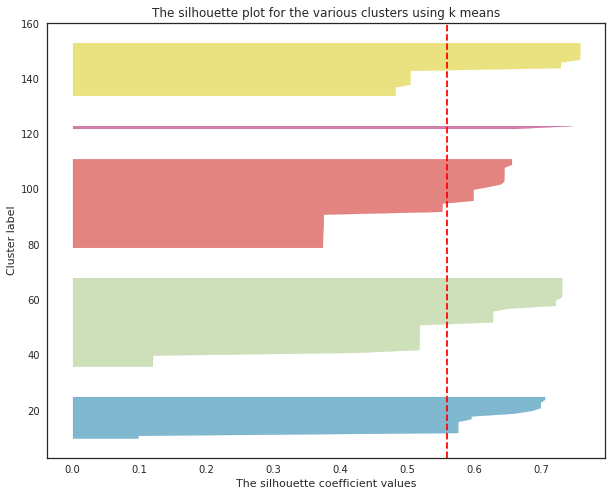

In [166]:
#plotting silhouette plot
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(figsize = (10,8))
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick',ax=ax)
ax.set_title("The silhouette plot for the various clusters using k means")
ax.set_xlabel("The silhouette coefficient values")
ax.set_ylabel("Cluster label")
visualizer.fit(x)

**The silhouette  score of k means clustering is 0.559 . And from silhouette plot we can see that clusters are separated from each other**

# **Hierarchical clustering**
Hierarchical clustering is another unsupervised machine learning algorithm, which is used to group the unlabeled datasets into a cluster and also known as hierarchical cluster analysis.

In [167]:
x1=df2.drop('Name',axis=1)


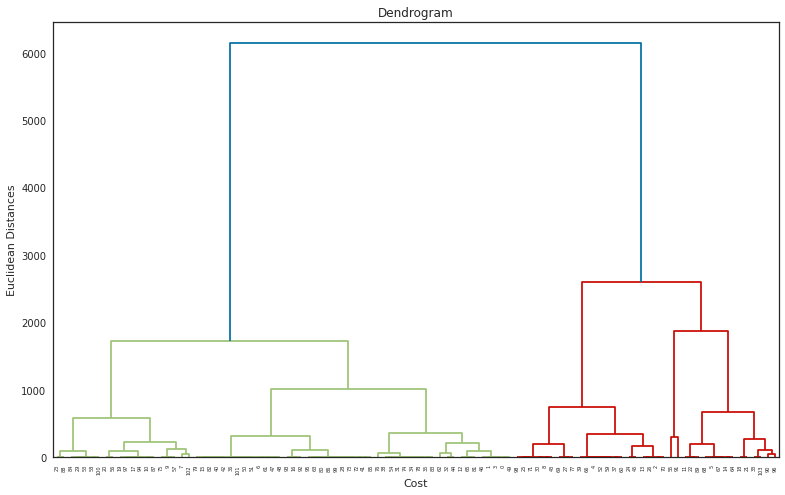

In [168]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(x1, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Cost')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

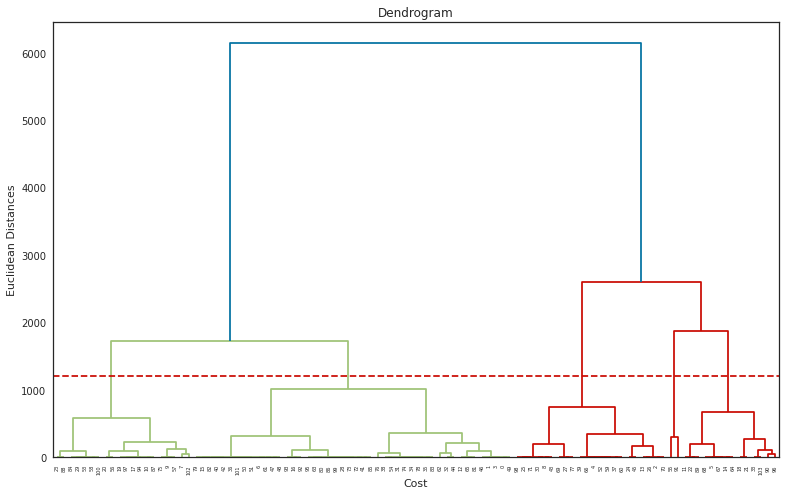

In [169]:
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(x1, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Cost')
plt.ylabel('Euclidean Distances')
plt.axhline(y=1200, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

**The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.**

**No. of Cluster = 5**

In [170]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


In [171]:
y_hc.shape

(104,)

In [172]:
#creating new variable
df2['hc_labels']=y_hc

Text(0.5, 1.0, 'visualizing clusters of Hierarchical clustering')

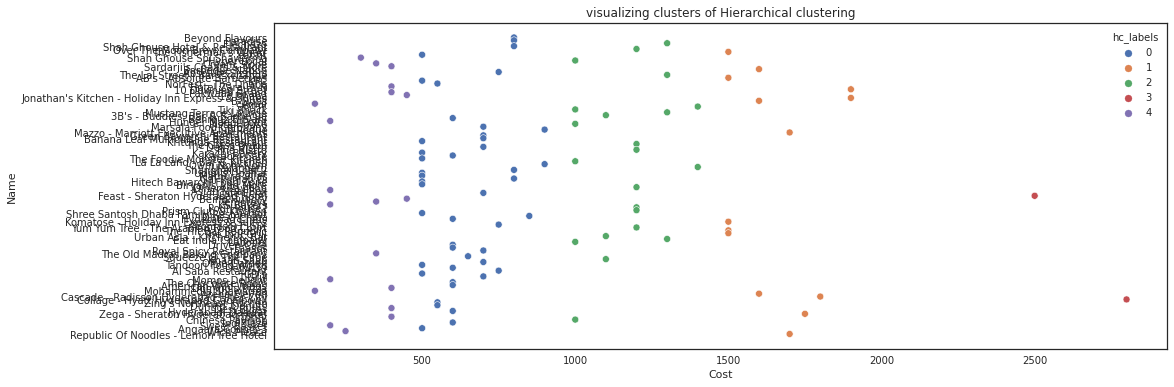

In [173]:
#plotting scatter plot to view the clusters formed by hierarchical clustering
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(x='Cost',y='Name',data=df2,hue='hc_labels', palette = 'deep')
plt.title('visualizing clusters of Hierarchical clustering')

After applying hierarchical clustering on dataset we can see from  scatter plot see that restaurants are divided into 5 clusters using Hierarchical clustering Based on the cuisines.

In [174]:
#creating clusters list
cluster_1 = df2[df2['hc_labels'] == 0].reset_index()
cluster_2 = df2[df2['hc_labels'] == 1].reset_index()
cluster_3 = df2[df2['hc_labels'] == 2].reset_index()
cluster_4 = df2[df2['hc_labels'] == 3].reset_index()
cluster_5 = df2[df2['hc_labels'] == 4].reset_index()

In [175]:
#creating list of clusters
clusters_list1=[cluster_1,cluster_2,cluster_3,cluster_4,cluster_5]

In [176]:
# Top cuisines in each cluster for Hierarchical clustering
for i,df2 in enumerate(clusters_list1):
  print(f'Top cuisines in cluster {i+1}\n', df2.drop(['index','Name','Cost','km_labels','hc_labels'],axis=1).sum().sort_values(ascending=False)[:5],'\n')

Top cuisines in cluster 1
 NorthIndian    27
Chinese        24
Biryani        15
FastFood       10
Desserts       7 
dtype: int64 

Top cuisines in cluster 2
 NorthIndian    9
Asian          6
Continental    5
Italian        4
Sushi          3
dtype: int64 

Top cuisines in cluster 3
 NorthIndian    16
Chinese        11
Continental    8 
Italian        7 
Asian          4 
dtype: int64 

Top cuisines in cluster 4
 Asian           2
Italian         2
Continental     2
ModernIndian    1
Chinese         1
dtype: int64 

Top cuisines in cluster 5
 NorthIndian    7
FastFood       5
Desserts       4
Chinese        4
Bakery         3
dtype: int64 



In [177]:
# Calculate Silhoutte Score
score = silhouette_score(x1, hc.labels_, metric='euclidean')
print('Silhouetter Score of hierachial clustering: %.3f' % score)

Silhouetter Score of hierachial clustering: 0.553


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


**From all the clusters the we can see that North Indian ,Chinese cuisines are present in almost  each cluster. so we can say that theses two cuisines are most preferred by customers. The silhouette  score of hierarchical clustering is 0.553 .**

# **SENTIMENTAL ANALYSIS**
Sentiment Analysis is the process of determining whether a piece of writing is positive, negative or neutral. A sentiment analysis system for text analysis combines natural language processing (NLP) and machine learning techniques to assign weighted sentiment scores to the entities, topics, themes and categories within a sentence or phrase.

In [178]:
#importing dataset
data1=pd.read_csv('/content/drive/MyDrive/AlmaBetter /Capstone projects /Ganesh Walimbe -capstone project -ZOMATO RESTAURANT CLUSTERING AND SENTIMENT ANALYSIS/Zomato Restaurant reviews.csv')

In [179]:
#printing first 5 rows
data1.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,"Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.",5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [180]:
data1.shape

(10000, 7)

In [181]:
#cheking for missing values present in 
#Zomato Restaurant reviews datset
data1.isnull().sum()

Restaurant    0 
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures      0 
dtype: int64

In [182]:
#dropping missing values
data1=data1.dropna()

In [183]:
#merging datasets together
df_sentiment = data.merge(data1, left_on='Name',right_on='Restaurant')

In [184]:
df_sentiment.isnull().sum()

Name          0
Cost          0
Cuisines      0
Timings       0
Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [185]:
df_sentiment.head()

,Name,Cost,Cuisines,Timings,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Swapnil Sarkar,"Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.",5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [186]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9855 entries, 0 to 9854
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9855 non-null   object
 1   Cost        9855 non-null   int64 
 2   Cuisines    9855 non-null   object
 3   Timings     9855 non-null   object
 4   Restaurant  9855 non-null   object
 5   Reviewer    9855 non-null   object
 6   Review      9855 non-null   object
 7   Rating      9855 non-null   object
 8   Metadata    9855 non-null   object
 9   Time        9855 non-null   object
 10  Pictures    9855 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 923.9+ KB


In [187]:
df_sentiment.Rating.value_counts()

5       3805
4       2340
1       1718
3       1172
2       675 
4.5     69  
3.5     47  
2.5     19  
1.5     9   
Like    1   
Name: Rating, dtype: int64

In [188]:
#coverting data types of columns
df_sentiment.loc[df_sentiment['Rating'] == 'Like'] = np.nan
df_sentiment['Rating']= df_sentiment['Rating'].astype('float64')

In [189]:
df_sentiment.Metadata.value_counts()

1 Review                        906
1 Review , 1 Follower           746
2 Reviews , 1 Follower          335
2 Reviews                       260
1 Review , 2 Followers          226
                               ... 
11 Reviews , 331 Followers      1  
22 Reviews , 79 Followers       1  
120 Reviews , 220 Followers     1  
11 Reviews , 26 Followers       1  
472 Reviews , 1302 Followers    1  
Name: Metadata, Length: 2465, dtype: int64

In [190]:
# split metadata column into 2 columns i.e. Reviews and followers
df_sentiment['Reviews'],df_sentiment['Followers']= df_sentiment['Metadata'].str.split(',').str
df_sentiment['Reviews'] = pd.to_numeric(df_sentiment['Reviews'].str.split(' ').str[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


In [191]:
#dropping metadata variable
df_sentiment = df_sentiment.drop(['Metadata'], axis =1)

In [192]:
#converting data type 
df_sentiment['Followers']= pd.to_numeric(df_sentiment['Followers'].str.split(' ').str[1])

In [193]:
# Converting Time column into Time, Year, Month, Hour
df_sentiment['Time']=pd.to_datetime(df_sentiment['Time'])
df_sentiment['Year'] = pd.DatetimeIndex(df_sentiment['Time']).year
df_sentiment['Month'] = pd.DatetimeIndex(df_sentiment['Time']).month
df_sentiment['Hour'] = pd.DatetimeIndex(df_sentiment['Time']).hour

In [194]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9855 entries, 0 to 9854
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        9854 non-null   object        
 1   Cost        9854 non-null   float64       
 2   Cuisines    9854 non-null   object        
 3   Timings     9854 non-null   object        
 4   Restaurant  9854 non-null   object        
 5   Reviewer    9854 non-null   object        
 6   Review      9854 non-null   object        
 7   Rating      9854 non-null   float64       
 8   Time        9854 non-null   datetime64[ns]
 9   Pictures    9854 non-null   float64       
 10  Reviews     9854 non-null   float64       
 11  Followers   8296 non-null   float64       
 12  Year        9854 non-null   float64       
 13  Month       9854 non-null   float64       
 14  Hour        9854 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(6)
memory usage: 1.2+ MB


In [195]:
#checking missing values
df_sentiment.isnull().sum()

Name          1   
Cost          1   
Cuisines      1   
Timings       1   
Restaurant    1   
Reviewer      1   
Review        1   
Rating        1   
Time          1   
Pictures      1   
Reviews       1   
Followers     1559
Year          1   
Month         1   
Hour          1   
dtype: int64

In [196]:
#cheking for duplicates
df_sentiment.duplicated().sum()

0

In [197]:
#filling missing value
df_sentiment['Followers'].fillna(0,inplace=True)

In [198]:
# dropping remaining missing data
df_sentiment.dropna(inplace=True)

# **Ratings and review analysis**

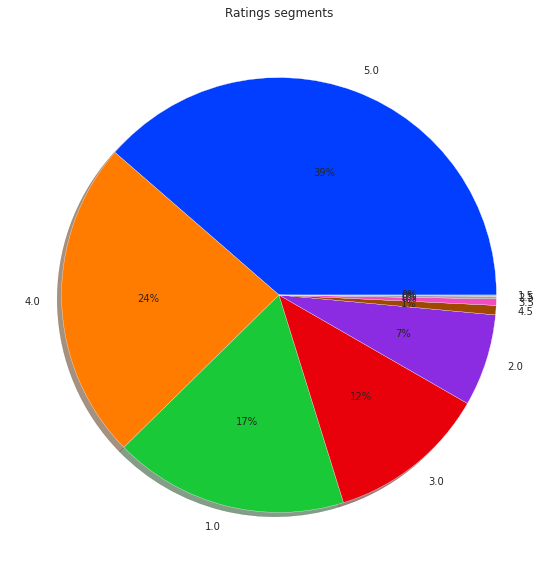

In [199]:
#plotting ratings segment pie chart
rating=df_sentiment["Rating"].value_counts()
rating
plt.figure(figsize=(10,10))
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
# plotting data on chart
plt.pie(rating, labels=rating.index, colors=palette_color, autopct='%.0f%%',shadow=True)
plt.title("Ratings segments")

plt.show()

From above pie chart we can see that 39% of customers has given 5 stars rating to the and 24% of customer has given 4 stars and 17% of customers has given 1 stars to restaurants


(-0.5, 1399.5, 1399.5, -0.5)

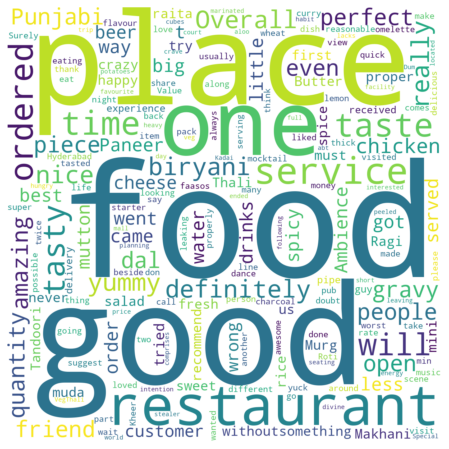

In [200]:
#Creating word cloud for reviews
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(15,8))
text = " ".join(name for name in df_sentiment.sort_values('Review',ascending=False).Review[:30])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

**From this word cloud we can see that ,customers are using words likes good ,place ,food ,service ,taste ,etc to give reviews to the restaurants**

# **Finding top rated restaurants**

In [201]:
#grouping columns together
highest_rated_restuarnt=df_sentiment.groupby(['Restaurant']).apply(lambda x:np.average(x['Rating'])).reset_index(name='AverageRatings')
highest_rated_restuarnt=highest_rated_restuarnt.sort_values(by='AverageRatings',ascending=False).head(10)
highest_rated_restuarnt

,Restaurant,AverageRatings
3,AB's - Absolute Barbecues,4.88
11,B-Dubs,4.81
2,"3B's - Buddies, Bar & Barbecue",4.76
67,Paradise,4.70
35,Flechazo,4.66
86,The Indi Grill,4.60
96,Zega - Sheraton Hyderabad Hotel,4.45
64,Over The Moon Brew Company,4.34
16,Beyond Flavours,4.28
19,Cascade - Radisson Hyderabad Hitec City,4.26


[Text(0.5, 1.0, 'Restuarants with highest average ratings')]

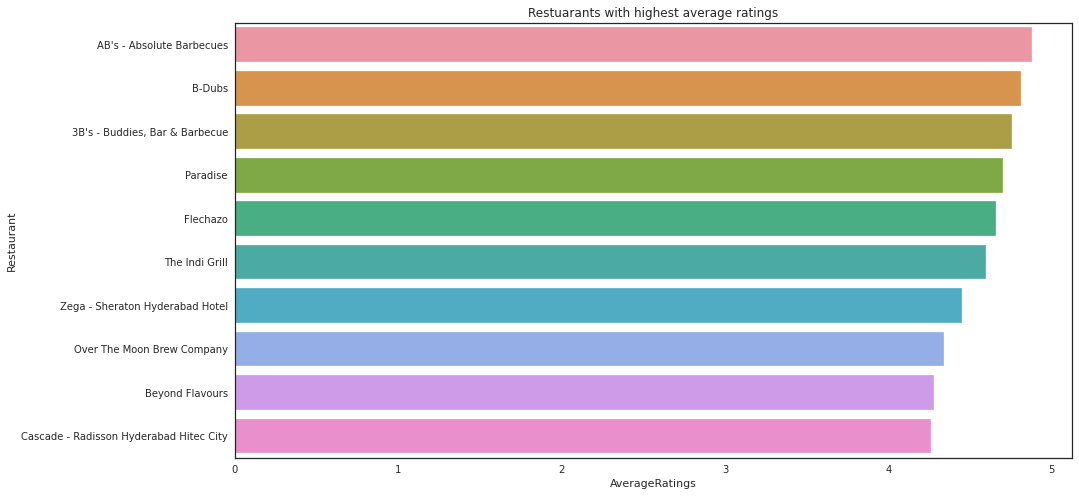

In [202]:
#plotting barplot to find top agents 
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=highest_rated_restuarnt,y=highest_rated_restuarnt['Restaurant'],x=highest_rated_restuarnt['AverageRatings'], ax=ax)
ax.set(title='Restuarants with highest average ratings')

**The highest rated restaurants according to average rating given to the restaurants by customers are as follows : AB’s –Absolute barbecues, B –Dubs 3B’s-Buddies,Bar & barbecues, Paradise and Flechaz**

# **Busiest months for restaurants**

In [203]:
#grouping columns together
busiest_month=df_sentiment.groupby(['Month']).apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')
busiest_month

,Month,Review_Count
0,1.0,629
1,2.0,693
2,3.0,1044
3,4.0,1235
4,5.0,1523
5,6.0,292
6,7.0,1326
7,8.0,675
8,9.0,645
9,10.0,629


[Text(0.5, 1.0, 'Busiest Months')]

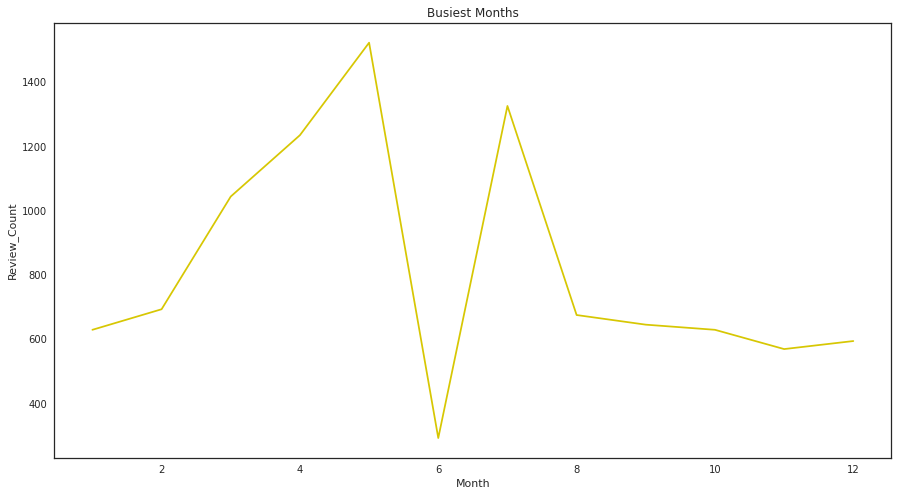

In [204]:
#plotting lineplot
fig,ax=plt.subplots(figsize=(15,8))
sns.lineplot(data=busiest_month,x=busiest_month['Month'] ,y=busiest_month['Review_Count'],color='y' ,ax=ax)
ax.set(title='Busiest Months')

From this lineplot we can see that ,   The restaurants are busiest in the month of April ,May and July  According to the reviewer count.  And there are less customers in month of  January, November and December.

# **TEXT PREPROCESSING**

In [205]:
#importing libraries
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import string
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [206]:
#defining function to remove punctuaion and stopwords
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [207]:
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [208]:
#removing punctuaion and stopwords
df_sentiment['reviews'] = df_sentiment['Review'].apply(text_process)

In [209]:
#dropping unecessary columns
df_sentiment=df_sentiment.drop(['Name','Cost','Cuisines','Timings','Reviewer','Time','Pictures','Followers','Year','Month','Hour','Reviews'],axis=1)
df_sentiment.head()

,Restaurant,Review,Rating,reviews
0,Beyond Flavours,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.",5.0,ambience good food quite good Saturday lunch cost effective Good place sate brunch One also chill friends parents Waiter Soumen Das really courteous helpful
1,Beyond Flavours,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5.0,Ambience good pleasant evening Service prompt Food good good experience Soumen Das kudos service
2,Beyond Flavours,A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.,5.0,must try great food great ambience Thnx service Pradeep Subroto personal recommendation Penne Alfredo Pasta Also music background amazing
3,Beyond Flavours,"Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.",5.0,Soumen das Arun great guy behavior sincerety good food course would like visit place
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.,5.0,Food goodwe ordered Kodi drumsticks basket mutton biryani good Thanks Pradeep served well enjoyed Ambience also good


In [210]:
# function to Remove non letters
import re
regex = re.compile('[^a-zA-Z]')
def remove_non_leters(text):
  '''used to remove all non leters form the list 
  '''
  text=[regex.sub(' ', x) for x in text]
  return text

In [211]:
#removing non letters
df_sentiment['reviews']=remove_non_leters(df_sentiment['reviews'])

In [212]:
df_sentiment.head()

,Restaurant,Review,Rating,reviews
0,Beyond Flavours,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.",5.0,ambience good food quite good Saturday lunch cost effective Good place sate brunch One also chill friends parents Waiter Soumen Das really courteous helpful
1,Beyond Flavours,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5.0,Ambience good pleasant evening Service prompt Food good good experience Soumen Das kudos service
2,Beyond Flavours,A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.,5.0,must try great food great ambience Thnx service Pradeep Subroto personal recommendation Penne Alfredo Pasta Also music background amazing
3,Beyond Flavours,"Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.",5.0,Soumen das Arun great guy behavior sincerety good food course would like visit place
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.,5.0,Food goodwe ordered Kodi drumsticks basket mutton biryani good Thanks Pradeep served well enjoyed Ambience also good


In [213]:
#importing libraries
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [214]:
#Create a function to get the subjectivity
def subjectivity(text): 
    return TextBlob(text).sentiment.subjectivity

In [215]:
#Create a function to get the polarity
def polarity(text): 
    return TextBlob(text).sentiment.polarity

In [216]:
#Create two new columns
df_sentiment['Subjectivity'] = df_sentiment['reviews'].apply(subjectivity)
df_sentiment['Polarity'] = df_sentiment['reviews'].apply(polarity)

In [217]:
#Create a function to compute the negative, neutral and positive output
def sentiment_output(polarity_score):
    if polarity_score <0:
        return 'Negative'
    elif polarity_score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [218]:
#computting sentiment scores
df_sentiment['sentiment_output'] = df_sentiment['Polarity'].apply(sentiment_output)

In [219]:
df_sentiment.head()

,Restaurant,Review,Rating,reviews,Subjectivity,Polarity,sentiment_output
0,Beyond Flavours,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.",5.0,ambience good food quite good Saturday lunch cost effective Good place sate brunch One also chill friends parents Waiter Soumen Das really courteous helpful,0.720000,0.660000,Positive
1,Beyond Flavours,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5.0,Ambience good pleasant evening Service prompt Food good good experience Soumen Das kudos service,0.691667,0.708333,Positive
2,Beyond Flavours,A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.,5.0,must try great food great ambience Thnx service Pradeep Subroto personal recommendation Penne Alfredo Pasta Also music background amazing,0.675000,0.550000,Positive
3,Beyond Flavours,"Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.",5.0,Soumen das Arun great guy behavior sincerety good food course would like visit place,0.675000,0.750000,Positive
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.,5.0,Food goodwe ordered Kodi drumsticks basket mutton biryani good Thanks Pradeep served well enjoyed Ambience also good,0.525000,0.525000,Positive


In [220]:
#defining independent and dependent variables
X = df_sentiment['reviews']
y = df_sentiment['sentiment_output']

In [221]:
#performing train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [222]:
#applying TEidfvectorizer on variables
from sklearn.feature_extraction.text import TfidfVectorizer

# Create feature vectors

vectorizer = TfidfVectorizer(min_df = 5,

                             max_df = 0.8,

                             sublinear_tf = True,

                             use_idf = True)

X_train= vectorizer.fit_transform(X_train)

X_test = vectorizer.transform(X_test)

# **support vector machine**
Support Vector Machine or SVM is one of the most popular Supervised Learning  algorithms, which is used for Classification as well as Regression problems

In [223]:
# importing libraries
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics

# Initialising SVM classifier with linear kernel
svm_classifier = svm.SVC(kernel='linear')

# training the model with the train data
svm_classifier.fit(X_train, y_train)
# testing the model in test data content
predicted_result = svm_classifier.predict(X_test)

# **Evaluation metrics of classification models**


**Accuracy** : Accuracy simply measures how often the classifier correctly predicts. We can define accuracy as the ratio of the number of correct predictions and the total number

***Precision ***: Precision explains how many of the correctly predicted cases actually turned out to be positive. Precision is useful in the cases where False Positive is a higher concern than False Negatives.

***Recall ***:  Recall explains how many of the actual positive cases we were able to predict correctly with our model

 **F1 score** : It gives a combined idea about Precision and Recall metrics. It is maximum when Precision is equal to Recall

In [224]:
#Support vector machine classifier evaluation metrics
print(metrics.classification_report(y_test,predicted_result))

              precision    recall  f1-score   support

    Negative       0.88      0.82      0.85       360
     Neutral       0.84      0.73      0.78        99
    Positive       0.95      0.97      0.96      1512

    accuracy                           0.93      1971
   macro avg       0.89      0.84      0.86      1971
weighted avg       0.93      0.93      0.93      1971



SVM classifier is giving us 92% accuracy.  Therefore  SVM is performing very well on the dataset to predict the sentiments

# **Logistic regression**
Logistic regression is one of the most popular Machine Learning algorithms,  which comes under the Supervised Learning technique. It is used for predicting  the categorical dependent variable using a given set of indepen

In [225]:
#fitting logistic regression model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [226]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [227]:
#evaluation metrics of logistic regression
print(metrics.classification_report(y_test,test_class_preds))

              precision    recall  f1-score   support

    Negative       0.91      0.78      0.84       360
     Neutral       0.91      0.40      0.56        99
    Positive       0.92      0.99      0.95      1512

    accuracy                           0.92      1971
   macro avg       0.91      0.72      0.78      1971
weighted avg       0.92      0.92      0.91      1971



Logistic regression is given us 91% accuracy  Therefore  logistic regression is performing well on the dataset to predict the sentiments

# **Random forest model**
Random forests or random decision forests is an ensemble learning method for  classification, regression and other tasks that operates by constructing a  multitude of decision trees at training time

In [228]:
#importing packges to fit random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [229]:
#fitting Random forest classifier
rf=RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [230]:
#getting predicted values of y train and y test
train_preds_rf =  rf.predict(X_train)
test_preds_rf  = rf.predict(X_test)

In [231]:
#random forest classifier evaluation metrics 
from sklearn import metrics
print(metrics.classification_report(test_preds_rf, y_test))

              precision    recall  f1-score   support

    Negative       0.67      0.93      0.78       260
     Neutral       0.81      0.74      0.77       108
    Positive       0.98      0.92      0.95      1603

    accuracy                           0.91      1971
   macro avg       0.82      0.86      0.83      1971
weighted avg       0.93      0.91      0.92      1971



**Random forest classifier (hyperparameter tuning)**

In [232]:
# Hyperparameter tuning of random forest classifier 

classifier = RandomForestClassifier()
grid_values = {'n_estimators':[5,10,25,30,50, 80,  100], 'max_depth':[3, 5, 7]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/l

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [5, 10, 25, 30, 50, 80, 100]},
             scoring='roc_auc')

In [233]:
#getting predicted values of y train and y test
train_preds_ht_rf =  classifier.predict(X_train)
test_preds_ht_rf  = classifier.predict(X_test)

In [234]:
#evaluation metrics of random forest classifier after hyperparameter tuning
print(metrics.classification_report(test_preds_ht_rf, y_test))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         0
     Neutral       0.00      0.00      0.00         0
    Positive       1.00      0.77      0.87      1971

    accuracy                           0.77      1971
   macro avg       0.33      0.26      0.29      1971
weighted avg       1.00      0.77      0.87      1971



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random forest classifier is given us 91% accuracy  Therefore  random forest classifier is performing well on the dataset to predict the sentiments I also performed hyperparameter tuning on random forest classifier. After hyperparameter tuning the accuracy did not improved

# **Conclusion :**
***Conclusions for EDA : ***

1.The most preferred cuisines in restaurants is North Indian, Chinese food, ontinental ,Biryani and fast food etc.

2.Customers spending is highest at restaurants named Collage-Hyatt Hyderabad Ghachibowli,Feast Sheraton Hyderabad hotel and 10 Downing street etc. Customers spending is lowest at restaurants named Amul ,Mohammedia shawarma and Hunger maggi point ,etc

3.The highest rated restaurants are AB’s –Absolute barbecues,B –Dubs and 3B’s-Buddies,Bar & barbecues.

4.The restaurants are busiest in the month of April ,May and July According to the reviewer count.And there are less number of customer in month of  January, November and December. 

5.Customers are using words likes good ,place ,food ,service ,taste ,etc to give reviews to the restaurants.

**Conclusions from clustering :**

1.k means clustering is giving us 5 clusters to divide restaurants on the basis of cuisines .k means is giving silhouette score of 0.559 The north indian cuisine and chinses cuisine is present in all clusters of k means clusters. so we can say that theses two cuisines are most preferred by customers in all restaurants.

2.Hierarchical clustering is also giving us 5 clusters to divide restaurants on the basis of cuisines .hierarchical clustering  is giving silhouette score of 0.553 The north Indian cuisine and Chinese cuisine is present in all clusters of hierarchical clusters. so we can say that theses two cuisines are most preferred by customers in all restaurants.

**Conclusions from sentimental analysis :**

i used three machine learning models for sentimental analysis those models are SVM classifier , logistic regression and random forest model.

1.Logistic regression and random forest model are both giving us accuracy of 91%.
2.Support vector machine classifier is giving highest among all the model i.e. 92%.Therefore we can use SVM for the predictions of sentiments
